# Exercise 8

Generate 4-dimensional data and demonstrate the usage of Uniform Manifold Approximation and Projection (UMAP) in dimensionality reduction to a 2-dimensional representation. Study the four main hyperparameters by plotting the graph and document their impact.

Note: The above exercise is adapted from UMAP documentation.

## Solutions

### UMAP

UMAP is a flexible non-linear dimension reduction algorithm. It seeks to learn the manifold structure of the data and find a low dimensional embedding that preserves the essential topological structure of that manifold.

UMAP Parameters

UMAP has several hyperparameters that can have a significant impact on the resulting embedding. However, the four major ones are `n_neighbors`, `min_dist`, `n_components`, `metric`.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['figure.dpi'] = 80

from umap import UMAP # !pip install umap_learn

In [2]:
# Generate a 4D dataset 
np.random.seed(42) 
data = np.random.rand(800, 4)

# 800 x 4 dimensions 
data.shape

(800, 4)

In [3]:
# UMAP Transformation 
reducer = UMAP() 
x = reducer.fit_transform(data)

# Reduced to 2D 
x.shape

(800, 2)

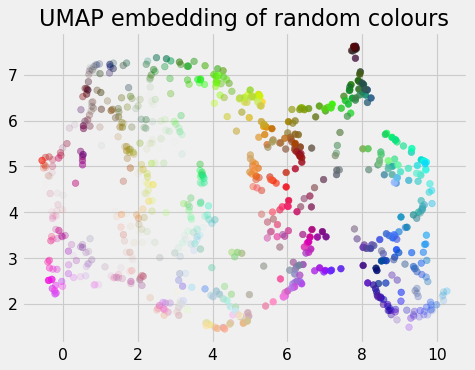

In [20]:
plt.scatter(x[:,0], x[:,1], c=data) 
# as the original dataset has 4 dimension, 
# we let c=data, to make the color show dimensionaility in the 2-D cooridination
plt.title('UMAP embedding of random colours');

As we can see from the above graph, similar colors that are a representation from the 4D space are embedded together. UMAP has several hyperparameters that can have a significant impact on the resulting embedding and the notable ones are `n_neighbors`, `min_dist`, `n_components`, `metric`.

As the original dataset has 4 dimension, we let c=data, to make the color show dimensionaility in the 2-D cooridination.

- **2-D coordination** shows how umap result is like.
- **Color** shows how the original data is like.

### User Defined Function

we’ll now create a user defined function for plotting to make our exploration simpler.

In [21]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    
    reducer = UMAP(n_neighbors=n_neighbors, 
                   min_dist=min_dist, 
                   n_components=n_components, 
                   metric=metric )

    x = reducer.fit_transform(data); 
    fig = plt.figure()

    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(x[:,0], range(len(x)), c=data)

    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(x[:,0], x[:,1], c=data)

    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x[:,0], x[:,1], x[:,2], c=data, s=100)

    plt.title(title)

### 1. n_neighbors

This parameter controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data. This means that low values of `n_neighbors` will force UMAP to concentrate on very local structure, while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data. But, this comes at the cost of losing fine detail structure for the sake of getting the broader of the data.

There is a local/global tradeoff provided by the value of `n_neighbors` and one may choose the neighborboods depending on the use case.

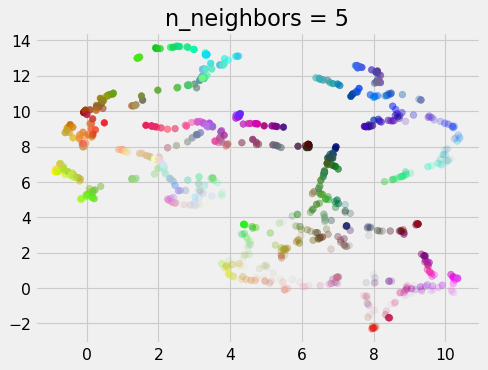

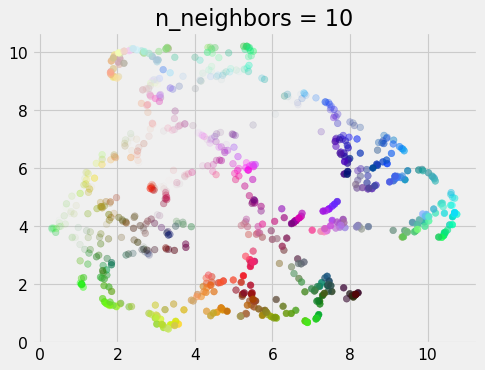

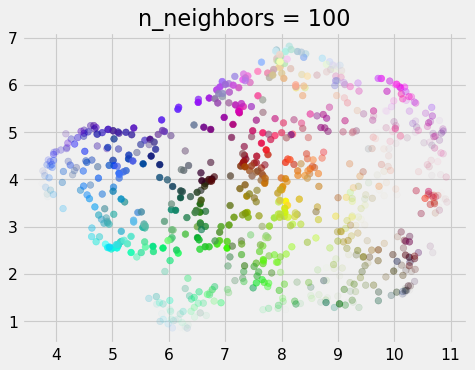

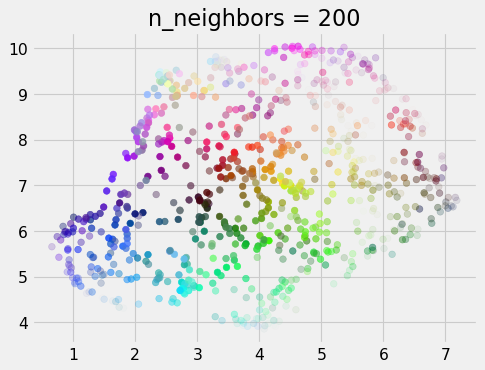

In [22]:
# this cell shows how the umap classification is sensitive to the parameter n-neighbours 
for n in (5, 10, 100, 200):
    draw_umap(n_neighbors=n, title=f'n_neighbors = {n}')

### 2. min_dist

The min_dist parameter controls how tightly UMAP is allowed to pack points together. Low values of `min_dist` will result in clumpier embeddings while larger values of `min_dist` will prevent UMAP from packing points together and will focus on the preservation of the broad topological structure.

We’ll now look range of values to visualize this behaviour.

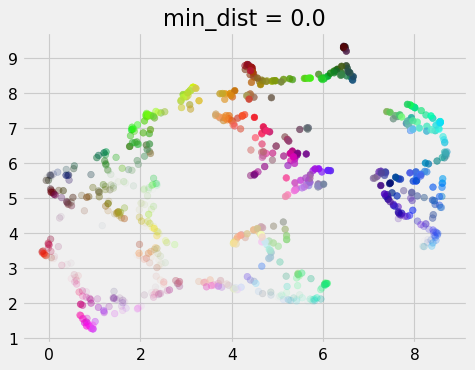

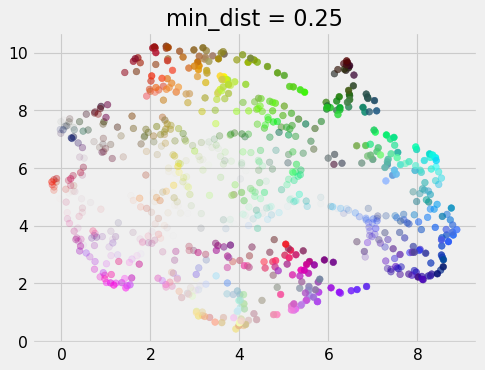

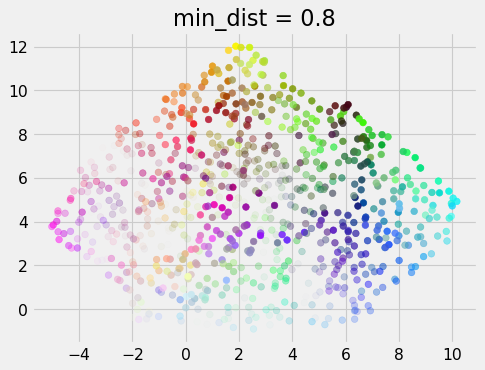

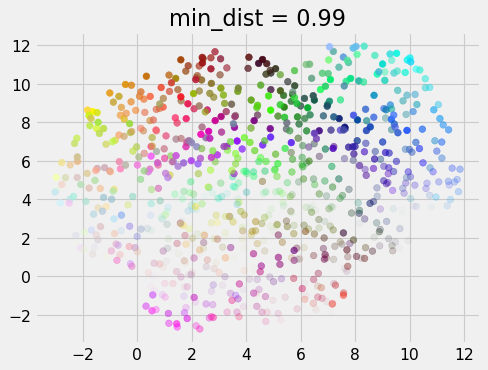

In [7]:
for d in (0.0, 0.25, 0.8, 0.99):
    draw_umap(min_dist=d, title=f'min_dist = {d}')

As seen from the plot above, as min_dist is increased the structures are pushed apart into softer more general features, providing a better overarching view of the data. Of course, this comes at the loss of the more detailed topological structure.

### 3. n_components

The n_components parameter option allows us to determine the dimensionality of the reduced dimension space that we will be embedding the data into. For the purposes of this exercise, we will only be looking at 1D and 3D embeddings.

First, we’ll set `n_components` to 1, forcing UMAP to embed the data in a line. For visualisation purposes we will randomly distribute the data on the y-axis to provide some separation between points. We then try `n_components = 3` and visualise it as basic 3D plot.

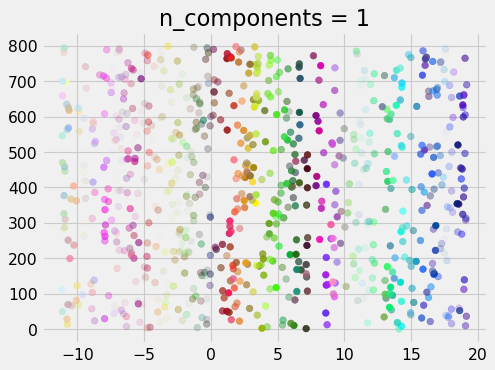

In [8]:
# 1D plot

draw_umap(n_components=1, title='n_components = 1')

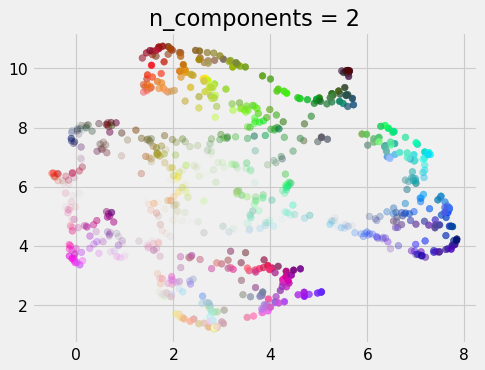

In [24]:
# 1D plot

draw_umap(n_components=2, title='n_components = 2')

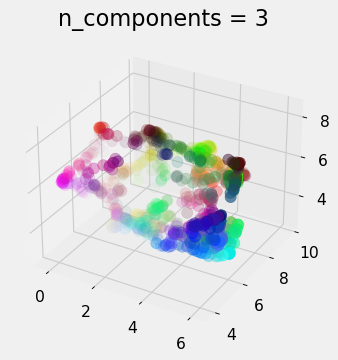

In [9]:
# 3D Plot 
draw_umap(n_components=3, title='n_components = 3')

The ease of UMAP in which it separates out the colors colors by preserving the topological structure of the data is the biggest strength. We can then easily scale up the dimensions to 50 or 100.

### 3. metric

The `metric` parameter is used to compute distance in high dimensional space. UMAP supports a wide variety of metrics as listed below:

##### 3.1 Minkowski style metrics

- euclidean
- manhattan
- chebyshev
- minkowski

#### 3.2 Miscellaneous spatial metrics

- canberra
- braycurtis
- haversine

#### 3.3 Normalized spatial metrics

- mahalanobis
- wminkowski
- seuclidean

#### 3.4 Angular and correlation metrics
 
- cosine
- correlation

#### 3.5 Metrics for binary data

- hamming
- jaccard
- dice
- russelrao
- kulsinski
- rogerstanimoto
- sokalmichener
- sokalsneath
- yule

UMAP also support custom user defined metrics as long as those metrics can be compiled in `nopython` mode by numba. For detailed workings on this refer UMAP documentation.

# Exercise 9

Showcase the usage of UMAP as a feature extraction technique for classification problems. Use the LinearSVC model to distinguish the performance pre and post-adaption of UMAP for feature extraction. You’re expected to perform pipeline operations by integrating UMAP for hyperparameter tuning.

Note: The above exercise is adapted from UMAP documentation. Use the Scikit-learn dataset to generate classification data (toy dataset) and GridSearchCV for hyperparameter tuning.

## Solutions

### UMAP as a Feature Extraction Technique for Classification

We use scikit-learn to create a dataset for a classification task. The dataset is then split into train and test set. We then choose LinearSVC model to fit the classification problem with and without the application of UMAP for feature extraction.

GridSearchCV is performed for hyperparameter tuning with 3 parameters `n_neighbors`, `n_components` and `SVC` C. The performance of the model is then evaluated on the test set with the accuracy metrics.

In [25]:
# Import libraries 
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.pipeline import Pipeline 
from sklearn.svm import LinearSVC

In [30]:
# Make a toy dataset 
X, y = make_classification(n_samples=1000, 
                           n_features=100, 
                           n_informative=50, 
                           n_redundant=0, 
                           n_repeated=0, 
                           n_classes=2, 
                           random_state=1212)

# Split the dataset into a training set and a test set 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.2, random_state=42 )

# Classification with a linear SVM 
svc = LinearSVC(dual=False, random_state=123) 
# grid search for C - the regularisation pentality sensitivity
params_grid = {"C": [10 ** k for k in range(-3, 4)]} 
clf = GridSearchCV(svc, params_grid) 
clf.fit(X_train, y_train) 
print(f"Accuracy on the test set with raw data: {clf.score(X_test, y_test):0.3}")

# Transformation with UMAP followed by classification with a linear SVM 
umap = UMAP(random_state=456) 
pipeline = Pipeline([("umap", umap), ("svc", svc)]) 
params_grid_pipeline = {
    "umap__n_neighbors": [5, 20], 
    "umap__n_components": [15, 25, 50], 
    "svc__C": [10 ** k for k in range(-3, 4)],
}

clf_pipeline = GridSearchCV(pipeline, params_grid_pipeline, n_jobs=-1) 
clf_pipeline.fit(X_train, y_train) 
print(f"Accuracy on the test set with UMAP transformation: {clf_pipeline.score(X_test, y_test):0.3}")

Accuracy on the test set with raw data: 0.705
Accuracy on the test set with UMAP transformation: 0.97


As evident from the above results, applicaiton of UMAP for feature extraction along with hypertuned parameters had better accuracy when compared to the plain linear model.